In [1]:
import csv
import pandas as pd
import numpy as np
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")


0.13  seconds elapsed


In [4]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

# Instantiate model with 1000 decision trees  
#-  1 tree had Accuracy:    81.01%. and took 1 sec.
# - 10 trees had Accuracy:  89.27%. and took 10 sec.
# - 100 trees had Accuracy: 90.87%. and took 102 sec.
# - 500 trees had Accuracy: 90.76%. and took 483 sec.
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];






Accuracy: 90.75999999999999 %.
483.4  seconds elapsed
[[7252  692]
 [ 797 7370]]
             precision    recall  f1-score   support

          0       0.90      0.91      0.91      7944
          1       0.91      0.90      0.91      8167

avg / total       0.91      0.91      0.91     16111

Accuracy: 0.9075786729563652
Variable: GO_Similarity_Score  Importance: 0.2
Variable: Host_Arg             Importance: 0.11
Variable: Host_Ile             Importance: 0.05
Variable: Host_Asp             Importance: 0.04
Variable: Host_Cys             Importance: 0.03
Variable: Host_Glu             Importance: 0.03
Variable: Host_Tyr             Importance: 0.03
Variable: Pathogen_Ala         Importance: 0.02
Variable: Pathogen_Pro         Importance: 0.02
Variable: Host_Ala             Importance: 0.02
Variable: Host_Asn             Importance: 0.02
Variable: Host_Gln             Importance: 0.02
Variable: Host_Gly             Importance: 0.02
Variable: Host_His             Importance: 0.02
Vari

In [3]:
#Naive Bayes.  Source Link: https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

start = time.time()   

# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(
   train_features,
    train_labels
)

#make a prediction
y_pred = gnb.predict(test_features)


#calcualte the accuracy
accuracy = sum(y_pred == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_labels,y_pred))  
print(classification_report(test_labels,y_pred)) 

end = time.time()

print(round(end - start,2)," seconds elapsed")



Accuracy: 71.13000000000001 %.
[[4807 3137]
 [1515 6652]]
             precision    recall  f1-score   support

          0       0.76      0.61      0.67      7944
          1       0.68      0.81      0.74      8167

avg / total       0.72      0.71      0.71     16111

0.13  seconds elapsed


Accuracy: 76.82 %.
[[6134 1810]
 [1924 6243]]
             precision    recall  f1-score   support

          0       0.76      0.77      0.77      7944
          1       0.78      0.76      0.77      8167

avg / total       0.77      0.77      0.77     16111

1848.23  seconds elapsed


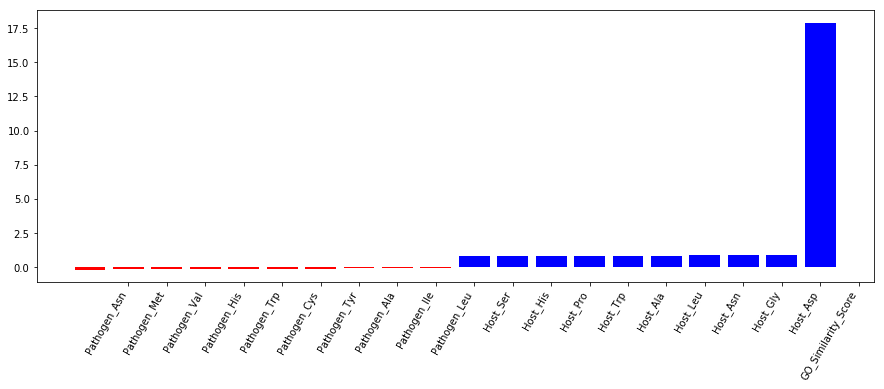

In [5]:
#SVM.  Source Link: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#ref https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

start = time.time()

from sklearn.svm import SVC 

#train
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train_features, train_labels)  

#make prediction
y_pred = svclassifier.predict(test_features)

#calcualte the accuracy
accuracy = sum(y_pred == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_labels,y_pred))  
print(classification_report(test_labels,y_pred))  

end = time.time()

print(round(end - start,2)," seconds elapsed")


plot_coefficients(svclassifier, feature_list)


